# Step-by-Step Tweet Sentiment Analysis Project

1. Import Required Libraries

In [1]:
pip install pandas numpy nltk textblob scikit-learn matplotlib seaborn wordcloud joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

2. Load Dataset

In [3]:
df = pd.read_csv("data_science.csv")
print("Dataset loaded")
print("Shape:", df.shape)

C:\Users\saksh\AppData\Local\Temp\ipykernel_9344\232911472.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_science.csv")


Dataset loaded
Shape: (241386, 36)


 3. Basic Preprocessing

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [6]:
df = df[['tweet']].dropna()
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

4. Sentiment Labeling (3 Classes)

In [7]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [8]:
df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)
print(df['sentiment'].value_counts())

sentiment
neutral     142084
positive     84520
negative     14782
Name: count, dtype: int64


In [9]:
df[['cleaned_tweet', 'sentiment']].head(10)

,cleaned_tweet,sentiment
0,done never blindly trust abstract press releas...,neutral
1,need paradigm shift modelcentric datacentric m...,neutral
2,using highresolution satellite data computer a...,negative
3,share four step help new data scientist delive...,positive
4,curriculum inherently brittle world indemand s...,neutral
5,many common colour map distort data uneven col...,neutral
6,wow wonderful congratulation thank maryland ne...,positive
7,register build hpediscover agenda today edge c...,neutral
8,modelops v mlops modelops key organization ent...,neutral
9,demystifying ai top application bigdata datasc...,positive


5. Visualizations: WordClouds

In [10]:
positive_words = ' '.join(df[df['sentiment']=='positive']['cleaned_tweet'])
negative_words = ' '.join(df[df['sentiment']=='negative']['cleaned_tweet'])

(-0.5, 399.5, 199.5, -0.5)

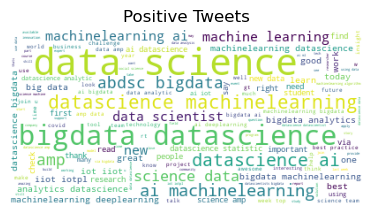

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(positive_words))
plt.title("Positive Tweets")
plt.axis('off')

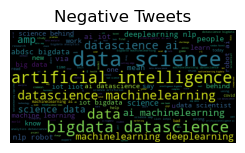

In [12]:
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='black').generate(negative_words))
plt.title("Negative Tweets")
plt.axis('off')
plt.show()

6. TF-IDF Vectorization

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['sentiment']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Model Comparison

In [15]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB()
}

Starting model comparison...

 Now training: Logistic Regression
 Logistic Regression training complete.
 Logistic Regression prediction complete.

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.63      0.72      2951
     neutral       0.93      0.96      0.94     28284
    positive       0.95      0.93      0.94     17043

    accuracy                           0.93     48278
   macro avg       0.90      0.84      0.87     48278
weighted avg       0.93      0.93      0.93     48278



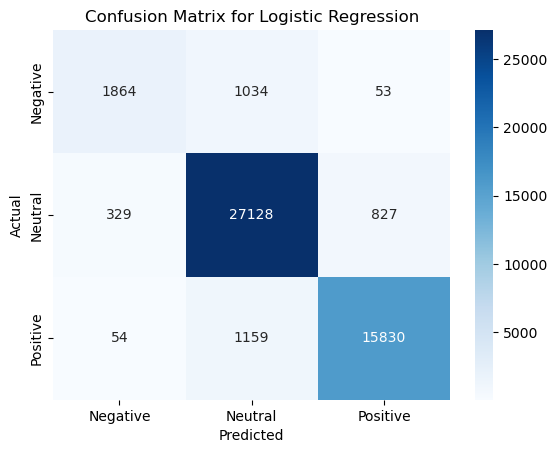


 Now training: Naive Bayes
 Naive Bayes training complete.
 Naive Bayes prediction complete.

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.17      0.29      2951
     neutral       0.81      0.94      0.87     28284
    positive       0.88      0.76      0.81     17043

    accuracy                           0.83     48278
   macro avg       0.85      0.62      0.66     48278
weighted avg       0.84      0.83      0.81     48278



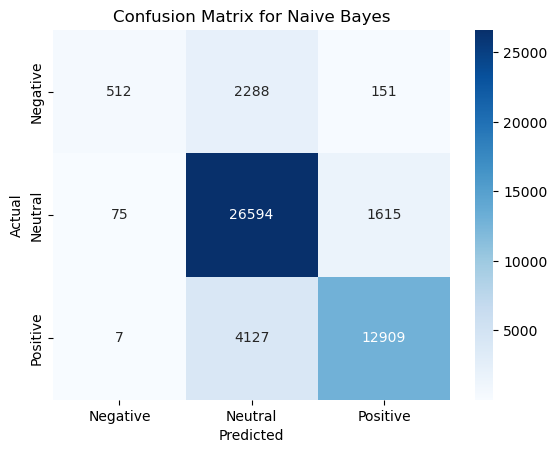

 Model comparison done.


In [16]:
print("Starting model comparison...")

for name, model in models.items():
    print(f"\n Now training: {name}")
    try:
        model.fit(X_train, y_train)
        print(f" {name} training complete.")

        y_pred = model.predict(X_test)
        print(f" {name} prediction complete.")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Neutral', 'Positive'],
                    yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    except Exception as e:
        print(f" Error in {name}: {e}")

print(" Model comparison done.")


8. Topic Modeling with LDA

In [21]:
df_sample = df.sample(n=5000, random_state=42)
count_data = count_vectorizer.fit_transform(df_sample['cleaned_tweet'])

In [24]:
lda = LatentDirichletAllocation(n_components=3, max_iter=5, random_state=42)
lda.fit(count_data)

LatentDirichletAllocation(max_iter=5, n_components=3, random_state=42)

In [25]:
for i, topic in enumerate(lda.components_):
    words = [count_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic #{i+1}: {' '.join(words)}")

Topic #1: join tech ai analytics la new amp datascience science data
Topic #2: algorithm datascientists deeplearning iot analytics abdsc ai machinelearning bigdata datascience
Topic #3: learning research need scientist team datascience big amp science data


9. Save Best Model

In [29]:
joblib.dump(models['Logistic Regression'], 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

10.Predict New Tweet

In [31]:
# Load model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Define text cleaning
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# 🔹 Ask for user input
user_tweet = input("Enter a tweet: ")

# 🔹 Clean and vectorize
cleaned = clean_text(user_tweet)
vectorized = vectorizer.transform([cleaned])

# 🔹 Predict sentiment
prediction = model.predict(vectorized)

# 🔹 Output result
print("\n Tweet:", user_tweet)
print(" Predicted Sentiment:", prediction[0])


Enter a tweet:   I hate traffic in the morning!



 Tweet:  I hate traffic in the morning!
 Predicted Sentiment: negative


In [1]:
import joblib

# Load model and vectorizer from same folder
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
